# Channel Estimation

In [1]:
using DSP
using FFTW

In [2]:
# Some Math tools
# Inverse Fourier Transform function
Fᴵ = ifft 

# Convolution infix operation
function ⊗(a, b) 
    return conv(a,b)
end


⊗ (generic function with 1 method)

In [3]:
include("rxsignal_withchannelandfreqoff.jl");

In [4]:
# RX Received Signal 3
Ŝᵣₓ³ = rxs3;

In [5]:
include("pss2.jl");

In [8]:
# PSS₂ signals and such
PSS₂ = pss_2;
PSS₂ᵀ = transpose.(PSS₂); # Hessian Transpose ?

In [9]:
# Transpose postfix operation
# struct Transposer end
# const ᵀ = Transposer() #typed \^T<TAB>
# Base.:(*)(x, ::Transposer) = transpose(x)

In [10]:
using LinearAlgebra

In [12]:
𝑆ₚₛₛ² = Fᴵ(PSS₂ᵀ); # S Slanted (fourier transform) in time domain
𝑆ₚₛₛ² ./= norm(𝑆ₚₛₛ²); 
𝑆ₚₛₛ² = vcat(𝑆ₚₛₛ²[(end-143):end], 𝑆ₚₛₛ²); size( 𝑆ₚₛₛ² )  # end is 2048 in this case, concat math 

(2192,)

In [13]:
S̅ₚₛₛ² = reverse(𝑆ₚₛₛ²); # reverse
S̅ₚₛₛ²ᴴ = conj(S̅ₚₛₛ²); # conjugate 
argmax = findmax

findmax (generic function with 8 methods)

In [14]:
m̂₂ = 10 * log10.(abs.( Ŝᵣₓ³ ⊗ S̅ₚₛₛ²ᴴ )); size( m̂₂ )

(618638, 1)

In [15]:
# Find maximum value and its index
Ĉᵩ², N̂ᵩ² = argmax(m̂₂) #; m2_chan[NF2_chan] or direct m2_chan[(6628)...] 

(50.649042476081405, CartesianIndex(6628, 1))

In [16]:
    DELTA_F = 10.0

    Fs = 61.44e6
    f_min = -7500
    f_max = 7500

    m = f_min:DELTA_F:f_max
    Y = zeros(ComplexF64, length(m))
    L = length(𝑆ₚₛₛ²)
    t = 0:(1/Fs):((L-1)/Fs)


0.0:1.6276041666666667e-8:3.566080729166667e-5

In [17]:
Nf = getindex(N̂ᵩ², 1)

6628

In [18]:
signal_part = Ŝᵣₓ³[Nf:(Nf + L -1)]; size( signal_part )

(2192,)

In [20]:
transConj = conj(𝑆ₚₛₛ²) .* transpose(signal_part); size( transConj )

(2192, 2192)

In [46]:
for j = 1:length(m)
    exp_comp = exp.(-2*pi*1.0im*m[j]*t)
    signal_offset = sum(exp_comp .* transConj)
    value = abs2.(signal_offset)
    Y[j] += value
end

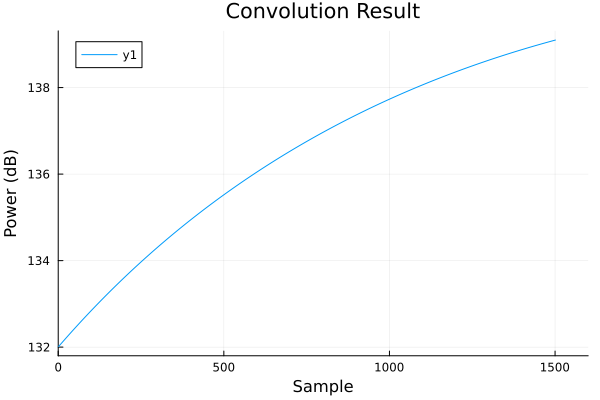

In [57]:
using Plots
Y_1 = 10 * log10.(abs.(Y))
m2_chan_plot = plot(Y_1, xlabel="Sample", ylabel="Power (dB)", title="Convolution Result"
    , xlim=(0, 1600)
    # , ylim=(1e10, 1.40e10)
)
# scatter(real(Y), imag(Y), label="roots",
# xlims=(-1.2,1.2), ylims=(-1.2,1.2), aspect_ratio=1,
# xlabel="Real part", ylabel="Imaginary part")
# size(Y)
#Y

In [162]:
# (A_fo, fo) = findmax(Y)
# println("Detected offset = 150Mhz", real(m2_chan))

# println("m ", length(m), ", A_fo ", A_fo, ", fo ", fo)

In [137]:
#function freq_offset_est(signal, pss_1, Nf)
    # Frequency offset estimator
#   plot(1:length(m), Y, ".", label="Frequency offset")
#end


In [138]:
# Grab the function Profs Frequency Offset with his values
# getindex(N̂ᵩ², 1) - length(𝑆ₚₛₛ²) + 1
# freq_offset_est(Ŝᵣₓ³, 𝑆ₚₛₛ², 0)
# freq_offset_est(rxs3, pss_2, 0)
# Detected offset: 150 Hz